# Using TKInter

Tcl/tk comes preinstalled with python 3.1. this is needed for Tkinter to run

### Exercise 1
Create a graphical interface that asks the user  to enter his name, first name and date of birth, 
and display  “last name first name was born on date of birth” 

This code accepts the names as well as the date of birth of the user and returns a strong that picks their last name, first name , and date of birth

- it has been optimised to restrict the date input to the mm/dd/yyyy format
- A regular expression is used to validate the date formula:
    - 0[1-9]|1[0-2] codes for the month, leading zero for months below 10 and leading 1 for numbers above 10
    - (0[1-9]|[12]\d|3[01]) codes for the day, 0[1-9] matches days from 0-9, the next part matches dates from 10-29, 12 for 1 or 2 and \d for any digit between 0-9. Last part is for 30 and 31
    - \d{4} codes for 4 digits
    

In [1]:
# imports the tkinter module

import tkinter as tk 

# creates a function to display formatted results
# when the user clicks submit

def display_result():
    last_name = last_name_entry.get() # gets the last name
    first_name = first_name_entry.get() # gets the first name
    dob = dob_entry.get() # gets the date of birth
    
    # validating the date format
    date_pattern =  r"^(0[1-9]|1[0-2])/(0[1-9]|[12]\d|3[01])/\d{4}$"
    
    if re.match(date_pattern, dob):
        
   # returns a string with the last name, first name, and the date of birth 
    # in a sentence
        formatted_result = f"{last_name} {first_name} was born on {dob}"
    
    # text formatting for the text size, color, font type
        result_label.config(text = formatted_result, fg='blue', font=('Arial', 14, 'bold'))
    else:
        result_label.config(text='Invalid date format. Please enter mm/dd/yyyy')
        
    
    
    

# initialises the tkinter main window

root = tk.Tk()

# sets the title of the main window
root.title('Name and Date of birth') 

# resizes the main window
root.geometry('400x200')

# create and pack widgets

# creates a label widget for the last name
last_name_label = tk.Label(root, text = 'Enter last name: ')

# packs the label into the main window
last_name_label.pack()

# creates a label widget for the last name
# with a width of 30 characters

last_name_entry = tk.Entry(root, width = 30)
last_name_entry.pack()

# creates a label widget for the first name

first_name_entry = tk.Label(root, text= 'Enter First name: ')
first_name_entry.pack()

first_name_entry = tk.Entry(root, width=30)
first_name_entry.pack()

# creates a label widget for the date of birth

dob_label = tk.Label(root, text = 'Enter Date of Birth:')
dob_label.pack()

dob_entry = tk.Entry(root, width = 30)
dob_entry.pack()


# displays the expected date format to guide the user on the input
expected_format_label = tk.Label(root, text="Expected Format: mm/dd/yyyy", fg="gray")
expected_format_label.pack()

submit_button = tk.Button(root, text='Submit', command=display_result)
submit_button.pack()

result_label = tk.Label(root, text='')
result_label.pack()

# start the main tkinter loop
root.mainloop()

#### Expected output looks something like this

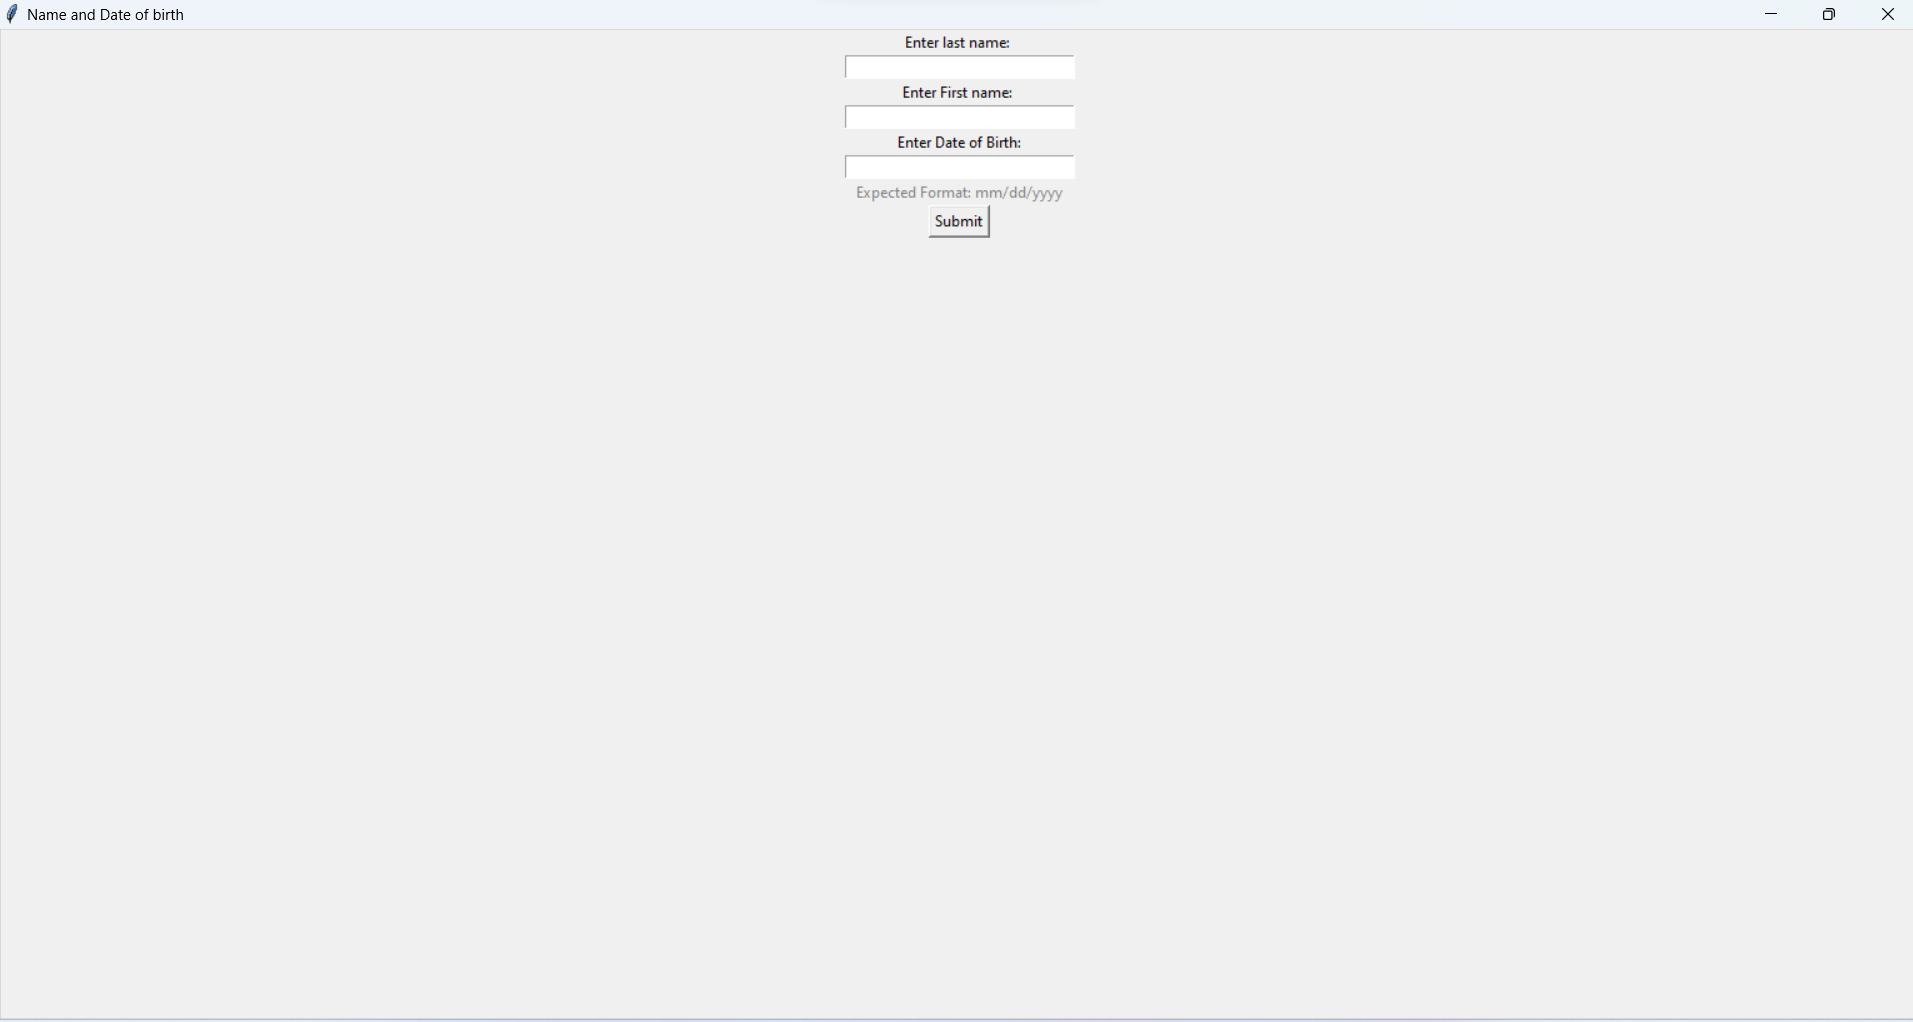

### Exercise 2

Create a graphical interface that displays the current time after clicking on the button 'current time'  

In [2]:
# strftime is a time module for formatting time 
from time import strftime

# function to display the current time

def time():
    # gets the current time in the Hour:minute:second AM/PM format
    string = strftime('%H:%M:%S %p')
    
    # updates the text of the label with the current time
    label.config(text=string)
    
    # update time every 1 second (1000 milliseconds)
    label.after(1000, time) 


# create main window
root = tk.Tk()

# sets the title of the window
root.title('Current time display')

# create label for displaying time
# specifies the font, size, background and foreground colours
label = tk.Label(root, font=('calibri', 40, 'bold'), background='purple', foreground='white')

# pack label on the window
# sets the position of the time label to center
label.pack(anchor='center')

# create a button to display the current time
button = tk.Button(root, text='Current Time', font=('calibri', 20, 'bold'), command=time)
button.pack(anchor = 'center')

# run the tkinter main loop
root.mainloop()

The expected window output looks like this after the user clicks on the current time button
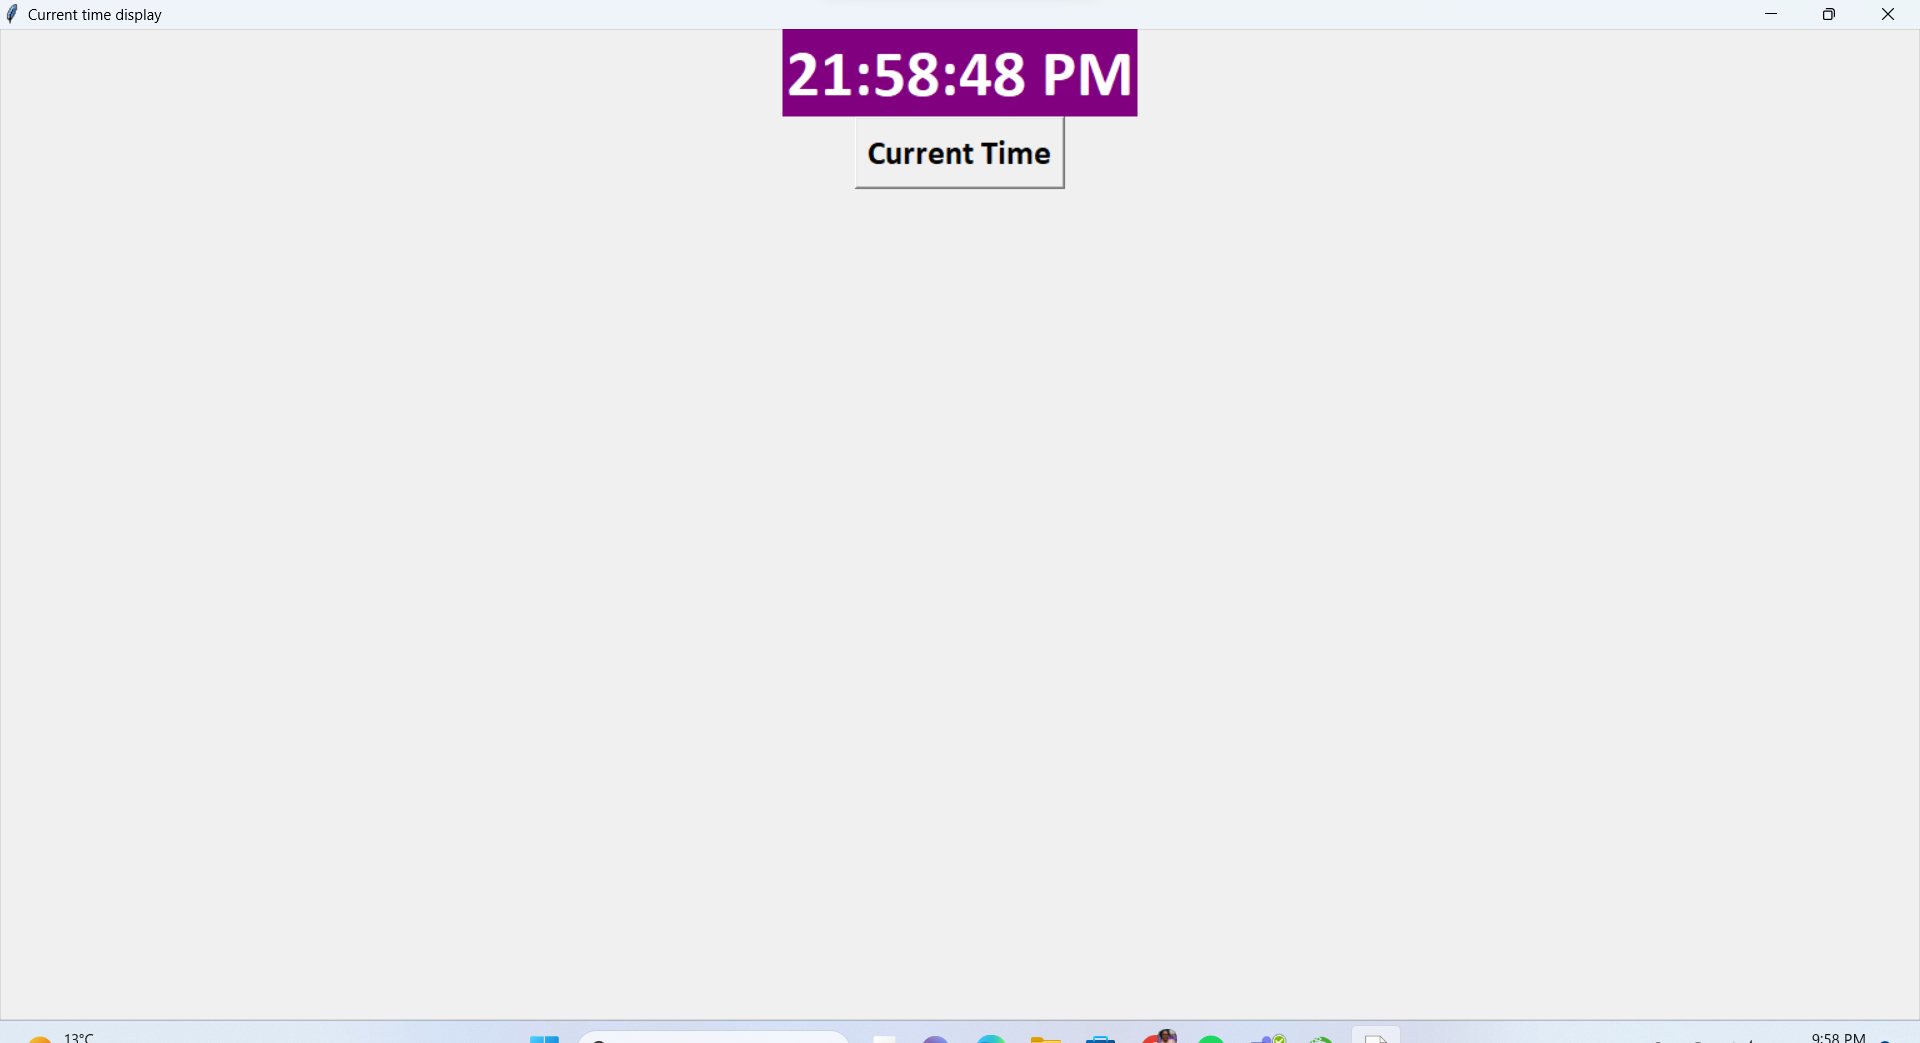

### Exercise 3

Build with tkinter a window containing a canvas and four buttons: 
- the button " Draw a circle " : displays in the canvas a circle of thickness 2 pixels whose coordinates (between 50 and 250) of the center and the radius (between 10 and 40) are random; 

- the button " Change color " should randomly change the color of the paths. The different possible colors are defined in the list: ['purple', 'cyan', 'green', 'red', 'blue', 'orange', 'black'] ; 

- the [Clear] button should clear all circles already drawn. It should reset the color of the next trace to 'blue'

In [3]:
import random

# function draws the circle randomly on the canvas
def draw_circle():
    # generate the random co-ordinates for both the center and co-ordinates of the circle
    x = random.randint(50, 250)
    y = random.randint(50, 250)
    radius = random.randint(10, 40)
    
    # choose a random color from the colors list
    color = colors[random.randint(0,6)]
    
    # draws the circle with the specified co-ordinates, radius
    
    circle_id = canvas.create_oval(x - radius, y - radius, x + radius, y+ radius, outline=color, width=2)
    circles.append(circle_id)

# function to change the color of the next circle
def change_color():
    if circles:
        last_circle_id = circles[-1]
    
    # chooses a random color from the colors list
    # sets it as outline color for the next circle
        canvas.itemconfig(last_circle_id, outline=colors[random.randint(0,6)])

def clear_circles():
    for circle_id in circles:
         # delete all items on the canvas

        canvas.delete(circle_id)
    # clear the circles list
    circles.clear()
    
    

# main tkinter window
root = tk.Tk()
# title of the window
root.title('Random circle drawer')

# creates the canvas with the width and height parameters
 
canvas = tk.Canvas(root, width=300, height = 300)
canvas.pack()

# buttons for drawing circles, chaging color and clearing circles
draw_button = tk.Button(root, text='Draw a circle', command=draw_circle)
draw_button.pack(side=tk.LEFT, padx=10)


# buttons for drawing circles, chaging color and clearing circles
color_button = tk.Button(root, text='Change color', command=change_color)
color_button.pack(side=tk.LEFT, padx=10)

# buttons for drawing circles, chaging color and clearing circles
clear_button = tk.Button(root, text='Clear', command=clear_circles)
clear_button.pack(side=tk.LEFT, padx=10)

# list to store drawn circles
circles = []

# list of possible colors for circles
colors = ['purple', 'cyan', 'green', 'red', 'blue', 'orange', 'black']

# main tkinter loop
root.mainloop()

### Note:

The **draw a Circle** button is able to draw as many circles. The **Change colour** button affects the last circle that was drawn by the Draw a Circle button. Not all the circles that are present on the canvas. The **Clear** button finally clears all the circles that have been drawn on the canvas

first output 
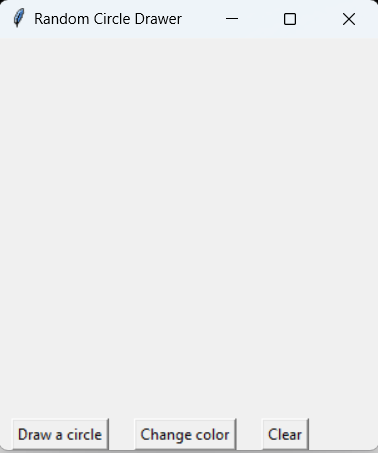


When you select draw circle, the circle is drawn with a random color
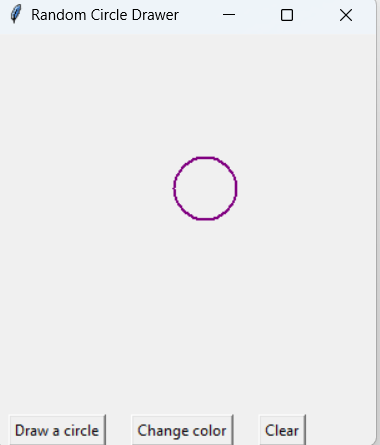

### Exercise 4

We want to build the graphical window below:
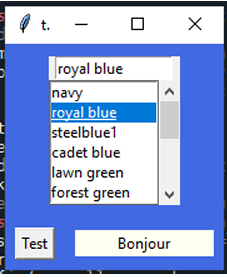


To do this, 
- we will use a combox widget which associates an **input field** with a **list box**

- the user of this widget can enter into the system either one of the items in the proposed list (by clicking on its name) or an unlisted item (by entering a new name in the entry field. 

- Our combo widget will therefore combine three basic tkinter widgets into one entity: an entry field, a listbox and a scrollbar. 

The listbox and its scrollbar will be closely associated, since the scrollbar allows you to scroll through the list in its box. It is important to ensure that the scrollbar is always the same height as the box, regardless of the size of the box. 

- When the user chooses a color from the list (he can also enter a color name directly in the input field), this color automatically becomes the background color for the master window. 

- The master window contains a label and a button, to show you how you can access the previously made selection in the ComboBox itself (the button causes the name of the last chosen color to be displayed). 

-Create this interface with tkinter.

In [30]:

# defines a class for the ComboBox widget
class ComboBox(tk.Frame):
    
    ''' a constructor method for the combobox class
    a constructor method is a special type of method that is automatically called when
    the object of a class is instantiated. it sets up the initial state of the object'''
    
    def __init__(self, master, *options):
        
        # calls the constructor of the parent class
        # passes the master widget
        
        super().__init__(master)
        
        # stores the master widget and available options
        # as instance variables
        
        self.master = master
        self.options = options
        
        # tracks the input in the entry field
        self.entry_var = tk.StringVar()
        
        # adds a trace to the entry variable to call update_listbox method
        # whenever it changes
        self.entry_var.trace('w', self.update_listbox)
        
        # entry field to allow user input
        self.entry = tk.Entry(self, textvariable = self.entry_var)
        
        # packs the entry field and makes it fill the horizontal space
        self.entry.pack(fill = tk.X)
        
        # list to display available color options
        self.listbox = tk.Listbox(self, height=len(options))
        # packs the listbox and aligns it to the left, makes it fil the entire vertical space
        self.listbox.pack(side=tk.LEFT, fill=tk.Y)
        
        # scrollbar for the listbox
        self.scrollbar = tk.Scrollbar(self, orient=tk.VERTICAL)
        
        # pack the scrollbar to the right of the list box and make it fill the vertical space
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.scrollbar.config(command = self.listbox.yview)
        
        # configures the listbox to use the scrollbar for vertical scrolling
        self.listbox.config(yscrollcommand=self.scrollbar.set)
        
        # binds the enter key to the selection function
        
        self.listbox.bind('<ButtonRelease-1>', self.on_listbox_select)
        self.entry.bind('<Return>', self.on_select)
        
        # insert available options into the listbox
        for option in options:
            self.listbox.insert(tk.END, option)
            
        # method to update the listbox based on the input of the entry field    
    def update_listbox(self, *args):
        input_text = self.entry_var.get().lower() 
            # clears the listbox
        self.listbox.delete(0, tk.END)
            
            #  iterate through the options and insert those that match the input
            # text into into the listbox
            
        for option in self.options:
            if input_text in option.lower():
                self.listbox.insert(tk.END, option)
                
    def on_listbox_select(self, event):
        selected_color = self.listbox.get(self.listbox.curselection())
        self.set_color(selected_color)
                    
        # method that handles the option selection
    def on_select(self, event):
            # gets the selected color from the entry field
        selected_color = self.entry_var.get()
            # sets the background color of the master window to the selected color
        self.set_color(selected_color)
            # updates the label to display the last chosen color
    def set_color(self, color):
        self.master.configure(bg=color)
        label.config(text=f'Last chosen color: {color}')

# create the main tkinter window            
root = tk.Tk()

# set the title of the main window
root.title('Color Selector')

# available color options
options = ['navy', 'royal blue', 'steel blue1', 'cadet blue', 'lawn green', 'forest green', 'yellow', 'green', 'pink']

# create an instance of the custom ComboBox widget, passing the main window
# and color options
combobox = ComboBox(root, *options)

# pack the combobox and add padding around it

combobox.pack(padx=10, pady=10)

# label to display the last chosen color
label = tk.Label(root, text='Last chosen color: None')

# packs the label and adds vertical padding
label.pack(pady=10)

#button to display the last chosen color
show_color_button = tk.Button(root, text = 'Show Chosen Color', command=lambda: label.config(text=f'Last chosen color: {combobox.entry_var.get()}'))

# pack the button
show_color_button.pack()

# start the tkinter main loop to run the application
root.mainloop()

Expected Output looks like this when the code is first run
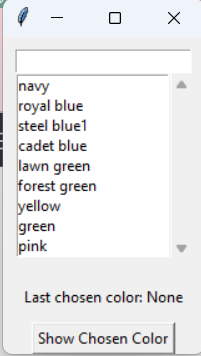


And when a colour is selected from the list
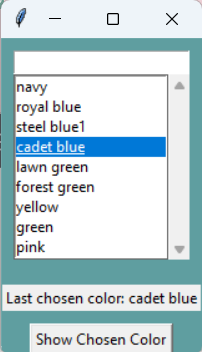


When an unknown color is typed in:
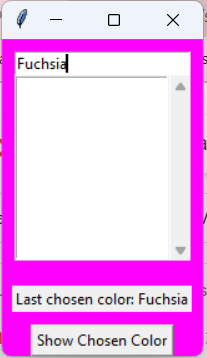

## Exercise 5a
a) Create a short program that will draw the 10 Olympic rings in a white rectangle. A "Quit" 
button should close the window. 


In [13]:
# creates a funtions to draw the rings
# the function takes canvas as a parameter

import tkinter as tk

# Create a function to draw Olympic rings
def draw_olympic_rings(canvas):
    # specifies the olympic band colors in a list
    colors = ["blue", "yellow", "black", "green", "red"]  # Colors for Olympic rings
    
    # the x-y co-ordinates for the Olympic rings
    ring_positions = [(100, 100), (200, 100), (300, 100), (150, 150), (250, 150)]
    
     # Ring radius
    ring_radius = 40 
    # loops through the colors and positions the rings
    
    for color, (x, y) in zip(colors, ring_positions):
        canvas.create_oval(x - ring_radius, y - ring_radius, x + ring_radius, y + ring_radius, outline=color, width=6)

# Create main application window
root = tk.Tk()
root.title("Olympic Rings")

# Create canvas to draw Olympic rings
canvas = tk.Canvas(root, width=400, height=300, bg="white")
canvas.pack()

# Draw Olympic rings
draw_olympic_rings(canvas)

# Create Quit button to close the window
quit_button = tk.Button(root, text="Quit", command=root.destroy)
# pack the quit button into the main window

quit_button.pack()

# Run the tkinter main loop
root.mainloop()


The expected output for the window
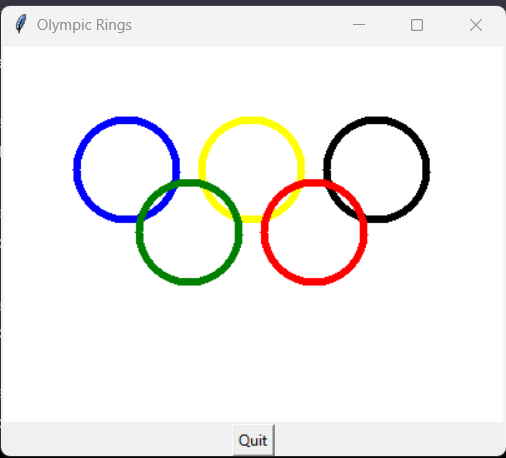

### Exercise 5b

b) Modify the above program by adding 5 buttons. Each of these buttons will cause each of the 5 rings to be drawn. 

In [26]:
# creates a function, olympic ring 
# the function has the parameters canvas, color, position

def draw_olympic_ring(canvas, color, position):
    ring_radius = 40
    x,y = position
    canvas.create_oval(x - ring_radius, y - ring_radius, x + ring_radius, y+ ring_radius, outline=color, width=6)
    
# creates the functions for each button click event

# blue ring
def draw_blue():
    draw_olympic_ring(canvas, 'blue', (100, 100))
    
# yellow ring
def draw_yellow():
    draw_olympic_ring(canvas, 'yellow', (200, 100))

# black ring
def draw_black():
    draw_olympic_ring(canvas, 'black', (300, 100))
    
# green ring
def draw_green():
    draw_olympic_ring(canvas, 'green', (150, 150))
# red ring    
def draw_red():
    draw_olympic_ring(canvas, 'red', (250, 150))

# creates the main application window
root = tk.Tk()
root.title('Olympic rings')
# creating a label for an opening text
opening_label = tk.Label(root, text='Click on the Buttons below to create the Olympic Symbol', font=('Arial', 14))
opening_label.pack()

canvas = tk.Canvas(root, width=400, height = 300, bg='white')
canvas.pack()


# creating the buttons that would create the rings

# blue button
blue_button = tk.Button(root, text='Blue ring', command=draw_blue)
blue_button.pack(side = tk.LEFT)

# yellow button
yellow_button = tk.Button(root, text='Yellow ring', command=draw_yellow)
yellow_button.pack(side = tk.LEFT)

# black button
black_button = tk.Button(root, text='Black ring', command=draw_black)
black_button.pack(side = tk.LEFT)

# green button
green_button = tk.Button(root, text='Green ring', command=draw_green)
green_button.pack(side = tk.LEFT)

# red button
red_button = tk.Button(root, text='Red ring', command=draw_red)
red_button.pack(side = tk.LEFT)

# quit button which terminates the entire program
quit_button = tk.Button(root, text='Quit', command= root.destroy)
quit_button.pack()

root.mainloop()

After Clicking all the buttons, the interface looks like
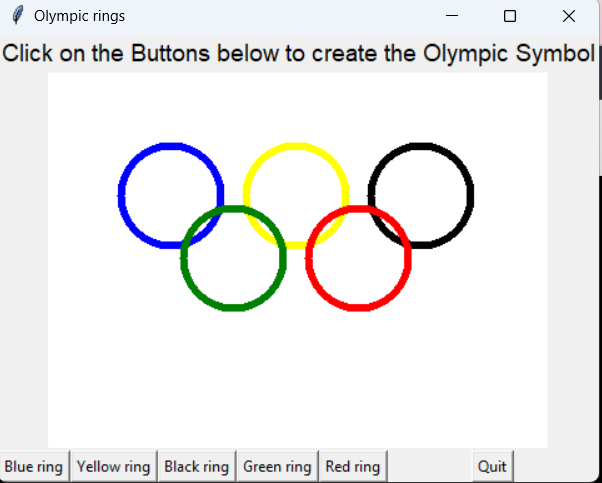


Before clicking on any of the buttons, the interface looks like 
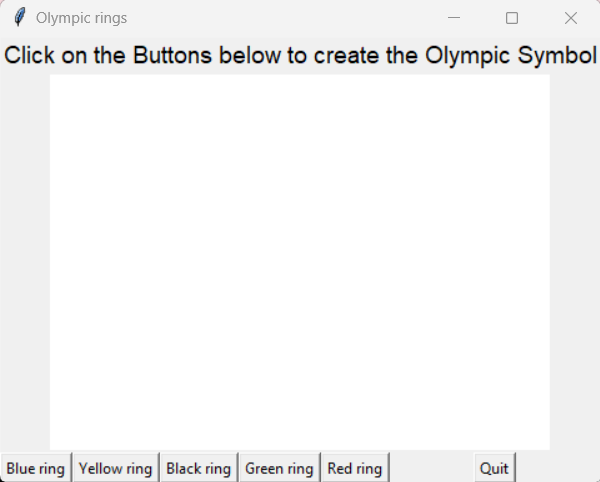

### Exercise 6

- Write a program that makes a window with a canvas appear. In this canvas, we will see two circles (of different size and color), which are supposed to represent two stars. 
- Buttons should allow you to move both of them at will in any direction. Below the canvas, the program should display permanently: 

a) the distance between the two stars 

b) the gravitational force they exert on each other (remember to display the masses chosen for each of them at the top of the window, as well as the distance scale). 

In this exercise, you will obviously use Newton's law of universal gravitation 

In [30]:
import math

# Constants
G = 6.674 * (10 ** -11)  # gravitational constant

# Function to calculate gravitational force
# takes the two masses of the stars, and the distance between them as parameters
# returns the force

def calculate_gravitational_force(mass1, mass2, distance):
    # gravitational constant G multiples the masses, m1 and m2
    # and divides product by the square of the distances between them 
    force = (G * mass1 * mass2) / (distance ** 2)
    return force

# Function to update the distance and gravitational force labels
def update_labels():
    # takes the co-ordinates of the stars
    x1, y1, _, _ = canvas.coords(star1)
    x2, y2, _, _ = canvas.coords(star2)
    
    # Calculates the distances between the stars using pythagoras theorem
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
    # calculates the force using Newton's law of Universal gravitation
    force = calculate_gravitational_force(mass1.get(), mass2.get(), distance)
    
    # updates the labels with the distance and gravitational force
    distance_label.config(text=f"Distance between stars: {distance} units")
    force_label.config(text=f"Gravitational force: {force} N")

# Function to move the stars
def move_stars(dx, dy):
    # specify the delta values to move the stars
    canvas.move(star1, dx, dy)
    canvas.move(star2, dx, dy)
    
    # update the labels after moving the stars
    update_labels()

# Create main window
root = tk.Tk()
root.title("Stars Simulation")

# Create canvas
canvas = tk.Canvas(root, width=500, height=400)
canvas.pack()

# Create stars
# fill the stars with yellow and red
star1 = canvas.create_oval(50, 50, 70, 70, fill="yellow")
star2 = canvas.create_oval(200, 150, 240, 190, fill="red")

# Create mass input fields
mass1 = tk.DoubleVar()
mass2 = tk.DoubleVar()

mass1.set(10000)  # initial mass of star 1
mass2.set(500)   # initial mass of star 2

mass_label1 = tk.Label(root, text="Mass of Star 1: ")
mass_label1.pack()
mass_entry1 = tk.Entry(root, textvariable=mass1)
mass_entry1.pack()

mass_label2 = tk.Label(root, text="Mass of Star 2: ")
mass_label2.pack()
mass_entry2 = tk.Entry(root, textvariable=mass2)
mass_entry2.pack()

# Create move buttons
up_button = tk.Button(root, text="Up", command=lambda: move_stars(0, -10))
up_button.pack(side=tk.LEFT)
down_button = tk.Button(root, text="Down", command=lambda: move_stars(0, 10))
down_button.pack(side=tk.LEFT)
left_button = tk.Button(root, text="Left", command=lambda: move_stars(-10, 0))
left_button.pack(side=tk.LEFT)
right_button = tk.Button(root, text="Right", command=lambda: move_stars(10, 0))
right_button.pack(side=tk.LEFT)

# Labels for distance and gravitational force
distance_label = tk.Label(root, text="Distance between stars: 0 units")
distance_label.pack()
force_label = tk.Label(root, text="Gravitational force: 0 N")
force_label.pack()

# Update labels initially
update_labels()

# Start the main loop
root.mainloop()


The output should look like this:
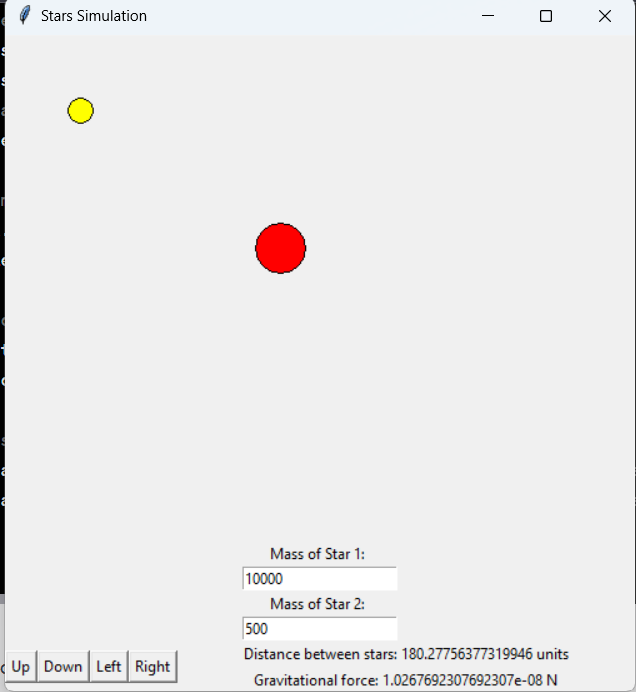

### Exercise 7

Program a simple calculator in python with tkinter. 
This calculator will be able to perform the following operations: addition, subtraction, multiplication, division and square root. 
Include a clear button 

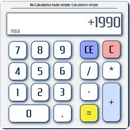

In [35]:
import tkinter as tk

# Function to handle button click events
def on_button_click(event):
    text = event.widget.cget("text")
    current_text = entry.get()

    # Perform corresponding action based on the button text
    if text == "=":
        try:
            result = str(eval(current_text))
            entry.delete(0, "end")
            entry.insert(0, result)
        except Exception as e:
            entry.delete(0, "end")
            entry.insert(0, "Error")
    elif text == "C":
        entry.delete(0, "end")
    else:
        entry.delete(0, "end")
        entry.insert(0, current_text + text)

root = tk.Tk()
root.geometry("400x500")  # Set the dimensions of the window
root.title("Classic Calculator")

# Calculate the width of the text area based on the width of the buttons
button_width = 6
text_area_width = button_width * 4

entry = tk.Entry(root, font=("Arial", 24), bd=10, insertwidth=4, width=text_area_width, borderwidth=4, justify='right')
entry.grid(row=0, column=0, columnspan=4, pady=10)  # Add vertical padding

# List of button texts for the calculator
button_texts = [
    "7", "8", "9", "/",
    "4", "5", "6", "*",
    "1", "2", "3", "-",
    "0", "C", "=", "+"
]

row_val = 1
col_val = 0

# Create buttons and place them in the grid with reduced gaps
for button_text in button_texts:
    button = tk.Button(root, text=button_text, font=("Arial", 18), width=button_width, height=3, relief="ridge")
    button.grid(row=row_val, column=col_val, padx=5, pady=5)  # Reduced padding between the buttons
    if button_text == "=":
        button.config(bg="yellow")
    elif button_text == "C":
        button.config(bg="red")
    button.bind("<Button-1>", on_button_click)
    col_val += 1
    if col_val > 3:
        col_val = 0
        row_val += 1

root.mainloop()


The output should look like this:
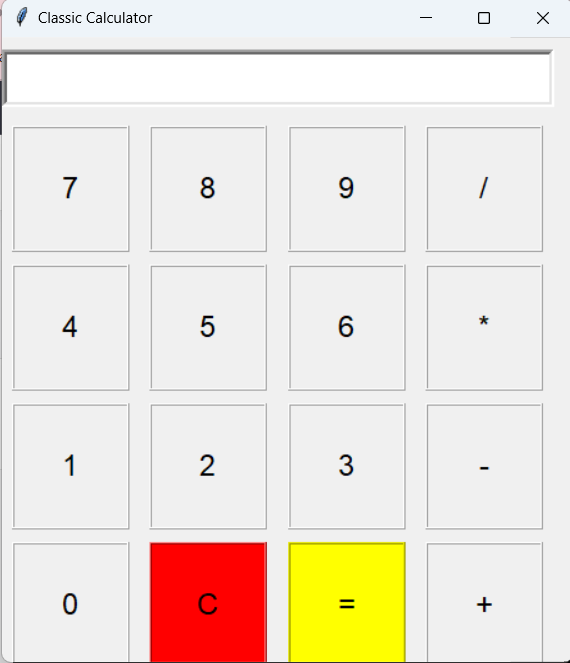

## Resources
1. OpenAI, 2023